# Anomaly detection using autoencoders

Dataset: https://www.kaggle.com/datasets/mishra5001/credit-card

We study the anomaly detection using the different types of autoencoder. We have the three types of autoencoders as follows:
<li> Dense
<li> Convolutional 
<li> LSTM
    
We compare the performance of the different autoencoders.

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')    
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, jaccard_score 
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D
from tensorflow.keras.layers import Conv1DTranspose, MaxPooling1D
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed
tf.keras.backend.set_floatx('float32')

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_X = pd.read_csv('train_X.csv', index_col=0)
test_X = pd.read_csv('test_X.csv', index_col=0)
val_X = pd.read_csv('val_X.csv', index_col=0)

train_y = pd.read_csv('train_y.csv', index_col=0)
test_y = pd.read_csv('test_y.csv', index_col=0)
val_y = pd.read_csv('val_y.csv', index_col=0)

In [4]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407088 entries, 0 to 407087
Columns: 142 entries, AMT_INCOME_TOTAL to BASEMENTAREA_MODE * NONLIVINGAREA_AVG
dtypes: float64(114), int64(28)
memory usage: 444.1 MB


In [5]:
#num_cols = list(train_X.select_dtypes('float64').columns)

In [6]:
'''
train_X = train_X[num_cols]
test_X = test_X[num_cols]
val_X = val_X[num_cols]
'''

'\ntrain_X = train_X[num_cols]\ntest_X = test_X[num_cols]\nval_X = val_X[num_cols]\n'

In [7]:
train = pd.concat([train_y, train_X], axis=1)
val = pd.concat([val_y, val_X], axis=1)

In [8]:
positive_train_X = train[train.TARGET==1].iloc[:,1:].astype('float32').values
negative_train_X = train[train.TARGET==0].iloc[:,1:].astype('float32').values
positive_val_X = val[val.TARGET==1].iloc[:,1:].astype('float32').values
negative_val_X = val[val.TARGET==0].iloc[:,1:].astype('float32').values

# Dense Autoencoder

In [9]:
epochs = 10
batch_size = 128
verbose = 1

In [10]:
input_shape = (negative_train_X.shape[-1],)

In [11]:
output_size = negative_train_X.shape[-1]

In [12]:
def denseautoencoder(input_shape, output_size):
    '''
    This model exploits the dense layers to construct the autoencoder.
    '''
    model = Sequential()
    model.add(Dense(2048, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.1))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(output_size, activation='softmax'))
    model.compile(loss='mae', optimizer='adam')
    return model

In [13]:
model = denseautoencoder(input_shape, output_size)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              292864    
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1

In [15]:
history = model.fit(negative_train_X, negative_train_X, epochs=epochs, batch_size=batch_size, validation_data=(negative_val_X, negative_val_X), verbose=verbose)

Epoch 1/10
1591/1591 [==============================] - 25s 15ms/step - loss: 0.4840 - val_loss: 0.4906
Epoch 2/10
1591/1591 [==============================] - 23s 14ms/step - loss: 0.4807 - val_loss: 0.4906
Epoch 3/10
1591/1591 [==============================] - 23s 14ms/step - loss: 0.4824 - val_loss: 0.4906
Epoch 4/10
1591/1591 [==============================] - 23s 14ms/step - loss: 0.4823 - val_loss: 0.4906
Epoch 5/10
1591/1591 [==============================] - 23s 14ms/step - loss: 0.4784 - val_loss: 0.4906
Epoch 6/10
1591/1591 [==============================] - 23s 14ms/step - loss: 0.4797 - val_loss: 0.4906
Epoch 7/10
1591/1591 [==============================] - 23s 14ms/step - loss: 0.4824 - val_loss: 0.4906
Epoch 8/10
1591/1591 [==============================] - 23s 14ms/step - loss: 0.4843 - val_loss: 0.4906
Epoch 9/10
1591/1591 [==============================] - 23s 14ms/step - loss: 0.4800 - val_loss: 0.4906
Epoch 10/10
1591/1591 [==============================] - 23s 14m

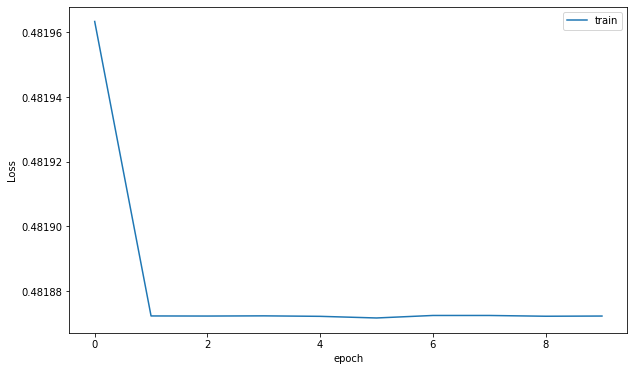

In [16]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')

In [17]:
def reconstruct_err(model, data):
    reconstructions = model.predict(data)
    #err = mean_squared_error(data.T, reconstructions.T, multioutput='raw_values')
    err = mean_absolute_error(data.T, reconstructions.T, multioutput='raw_values')
    return err

In [18]:
negative_err = reconstruct_err(model, negative_train_X)
positive_err = reconstruct_err(model, positive_train_X)

diff = []
negative_percentile = []
positive_percentile = []
for i in range(1,100):
    diff.append(np.abs(np.percentile(negative_err, i) - np.percentile(positive_err, 100-i)))
    negative_percentile.append(np.percentile(negative_err, i))
    positive_percentile.append(np.percentile(positive_err, 100-i))

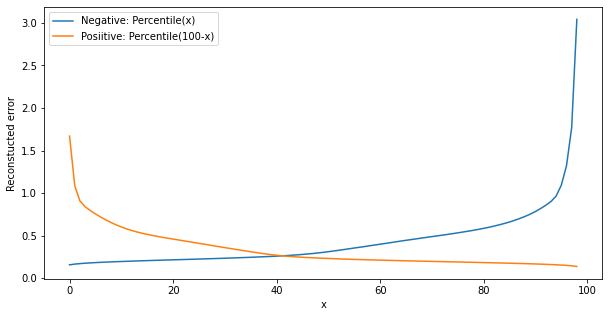

In [19]:
plt.figure(figsize=(10,5))
plt.plot(negative_percentile, label='Negative: Percentile(x)')
plt.plot(positive_percentile, label='Posiitive: Percentile(100-x)')
plt.legend()
plt.ylabel('Reconstucted error')
plt.xlabel('x')
plt.show()

On average, the reconstructed error of negative data is higher

In [20]:
min_index = np.argmin(diff)
threshold = np.percentile(negative_err, min_index) 

In [21]:
err = reconstruct_err(model, test_X)

In [22]:
def prediction(err, test_y):
    size = test_y.shape[0]
    index = np.where(err<threshold)
    index = list(index[0])
    pred = [0]*size
    for i in index:
        pred[i] = 1
    return pred

In [23]:
pred_dict = {}

In [24]:
pred_dict['dense'] = prediction(err, test_y)

In [25]:
def classification_metrics(truedata, pred):
    print("Metrics")
    print("=======================")
    tn, fp, fn, tp = confusion_matrix(truedata, pred).ravel()
    print("True positive: ", tp)
    print("True negative: ", tn)
    print("False positive: ", fp)
    print("False negative: ", fn)
    print()
    acc = accuracy_score(truedata, pred)
    f1 = f1_score(truedata, pred)
    jaccard = jaccard_score(truedata, pred)
    sensitivity = tp / (tp + fn)
    specificity = tn / (fp + tn)
    gmean = np.sqrt(sensitivity*specificity)
    print("Accuracy: ", round(acc,3))
    print("F1 score: ", round(f1,3))
    print("Jaccard Score: ", round(jaccard,3))
    print("G-Mean: ", round(gmean,3))
    return [acc, f1, jaccard, gmean]

In [26]:
column = ['Accuracy', 'F1 Score', 'Jaccard Score', 'G-Mean']
metrics = pd.DataFrame(columns=column)

temp = pd.DataFrame(classification_metrics(test_y, pred_dict['dense'])).T
temp.columns = column
metrics = pd.concat([metrics, temp], axis=0)

metrics_index = []
metrics_index.append('Dense')

Metrics
True positive:  2250
True negative:  33383
False positive:  23141
False negative:  2729

Accuracy:  0.579
F1 score:  0.148
Jaccard Score:  0.08
G-Mean:  0.517


In [27]:
tf.keras.backend.clear_session()

# Convolutional Autoencoder

In [28]:
positive_train_X = positive_train_X.reshape(positive_train_X.shape[0], positive_train_X.shape[-1], 1)
negative_train_X = negative_train_X.reshape(negative_train_X.shape[0], negative_train_X.shape[-1], 1)
positive_val_X = positive_val_X.reshape(positive_val_X.shape[0], positive_val_X.shape[-1], 1)
negative_val_X = negative_val_X.reshape(negative_val_X.shape[0], negative_val_X.shape[-1], 1)

In [29]:
test_X = test_X.values.reshape(test_X.shape[0], test_X.shape[-1], 1)

In [30]:
input_shape = (negative_train_X.shape[1], 1)

In [31]:
def convolutionalautoencoder(input_shape):
    '''
    This model exploits the convolutional layers to construct the autoencoder.
    '''
    model = Sequential()
    model.add(Conv1D(filters=512, kernel_size=9, padding="same", strides=1, activation="relu", input_shape=input_shape))
    model.add(Dropout(rate=0.1))
    model.add(Conv1D(filters=256, kernel_size=9, padding="same", strides=1, activation="relu"))
    model.add(Dropout(rate=0.1))
    model.add(Conv1D(filters=128, kernel_size=9, padding="same", strides=1, activation="relu"))
    model.add(Dropout(rate=0.1))
    model.add(Conv1D(filters=64, kernel_size=9, padding="same", strides=1, activation="relu"))
    model.add(Dropout(rate=0.1))
    model.add(Conv1DTranspose(filters=64, kernel_size=9, padding="same", strides=1, activation="relu"))
    model.add(Dropout(rate=0.1))
    model.add(Conv1DTranspose(filters=128, kernel_size=9, padding="same", strides=1, activation="relu"))
    model.add(Dropout(rate=0.1))
    model.add(Conv1DTranspose(filters=256, kernel_size=9, padding="same", strides=1, activation="relu"))
    model.add(Dropout(rate=0.1))
    model.add(Conv1DTranspose(filters=512, kernel_size=9, padding="same", strides=1, activation="relu"))
    model.add(Dropout(rate=0.1))
    model.add(Conv1DTranspose(filters=1, kernel_size=9, padding="same"))
    model.compile(optimizer='adam',loss="mae")
    return model

In [32]:
model = convolutionalautoencoder(input_shape)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 142, 512)          5120      
_________________________________________________________________
dropout (Dropout)            (None, 142, 512)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 142, 256)          1179904   
_________________________________________________________________
dropout_1 (Dropout)          (None, 142, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 142, 128)          295040    
_________________________________________________________________
dropout_2 (Dropout)          (None, 142, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 142, 64)           7

In [34]:
history = model.fit(negative_train_X, negative_train_X, epochs=epochs, batch_size=batch_size, validation_data=(negative_val_X, negative_val_X), verbose=verbose)

Epoch 1/10
1591/1591 [==============================] - 432s 269ms/step - loss: 0.1911 - val_loss: 0.0375
Epoch 2/10
1591/1591 [==============================] - 422s 265ms/step - loss: 0.0715 - val_loss: 0.0336
Epoch 3/10
1591/1591 [==============================] - 411s 258ms/step - loss: 0.0735 - val_loss: 0.0417
Epoch 4/10
1591/1591 [==============================] - 416s 261ms/step - loss: 0.0632 - val_loss: 0.0496
Epoch 5/10
1591/1591 [==============================] - 419s 263ms/step - loss: 0.0617 - val_loss: 0.0552
Epoch 6/10
1591/1591 [==============================] - 420s 264ms/step - loss: 0.0663 - val_loss: 0.0978
Epoch 7/10
1591/1591 [==============================] - 422s 265ms/step - loss: 0.0624 - val_loss: 0.0494
Epoch 8/10
1591/1591 [==============================] - 419s 263ms/step - loss: 0.0565 - val_loss: 0.0683
Epoch 9/10
1591/1591 [==============================] - 422s 265ms/step - loss: 0.0681 - val_loss: 0.0383
Epoch 10/10
1591/1591 [=======================

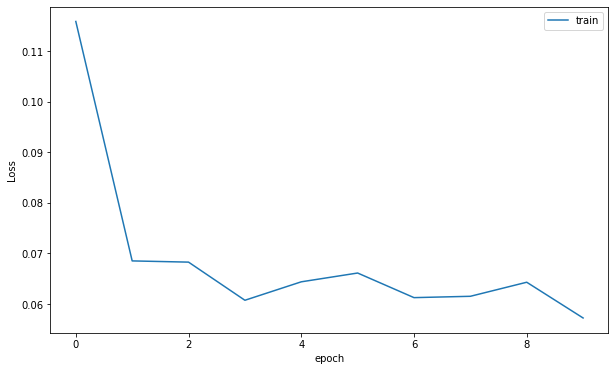

In [35]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

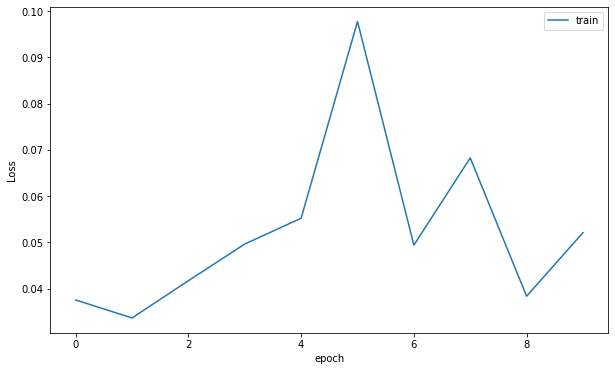

In [36]:
plt.figure(figsize=(10,6))
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

In [37]:
def conv_reconstruct_err(model, data):
    reconstructions = model.predict(data)[:,:,0]
    #err = mean_squared_error(data[:,:,0].T, reconstructions.T, multioutput='raw_values')
    err = mean_absolute_error(data[:,:,0].T, reconstructions.T, multioutput='raw_values')
    return err

In [38]:
negative_err = conv_reconstruct_err(model, negative_train_X)
positive_err = conv_reconstruct_err(model, positive_train_X)

diff = []
negative_percentile = []
positive_percentile = []
for i in range(1,100):
    diff.append(np.abs(np.percentile(negative_err, i) - np.percentile(positive_err, 100-i)))
    negative_percentile.append(np.percentile(negative_err, i))
    positive_percentile.append(np.percentile(positive_err, 100-i))
    
min_index = np.argmin(diff)
threshold = np.percentile(negative_err, min_index) 

err = conv_reconstruct_err(model, test_X)

pred_dict['Convolutional'] = prediction(err, test_X)

temp = pd.DataFrame(classification_metrics(test_y, pred_dict['Convolutional'])).T
temp.columns = column
metrics = pd.concat([metrics, temp], axis=0)

metrics_index.append('Convolutional')

Metrics
True positive:  2521
True negative:  30596
False positive:  25928
False negative:  2458

Accuracy:  0.538
F1 score:  0.151
Jaccard Score:  0.082
G-Mean:  0.524


In [39]:
tf.keras.backend.clear_session()

# LSTM Autoencoder

In [40]:
positive_train_X = positive_train_X.reshape(positive_train_X.shape[0], 1, positive_train_X.shape[1])
negative_train_X = negative_train_X.reshape(negative_train_X.shape[0], 1, negative_train_X.shape[1])
positive_val_X = positive_val_X.reshape(positive_val_X.shape[0], 1, positive_val_X.shape[1])
negative_val_X = negative_val_X.reshape(negative_val_X.shape[0], 1, negative_val_X.shape[1])

In [41]:
test_X = test_X.reshape(test_X.shape[0], 1, test_X.shape[1])

In [42]:
input_shape = (1, negative_train_X.shape[-1])

In [43]:
output_size = negative_train_X.shape[-1]

In [44]:
def lstmautoencoder(input_shape, output_size):
    '''
    This model adopts the LSTM layer to construct the autoencoder.
    '''
    model = Sequential()
    model.add(LSTM(2056, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(Dropout(rate=0.1))
    model.add(LSTM(1024, activation='relu', return_sequences=True))
    model.add(Dropout(rate=0.1))
    model.add(LSTM(512, activation='relu', return_sequences=True))
    model.add(Dropout(rate=0.1))
    model.add(LSTM(256, activation='relu', return_sequences=True))
    model.add(Dropout(rate=0.1))
    model.add(LSTM(128, activation='relu', return_sequences=False))
    model.add(Dropout(rate=0.1))
    model.add(RepeatVector(1))
    model.add(LSTM(128, activation='relu', return_sequences=True))
    model.add(Dropout(rate=0.1))
    model.add(LSTM(256, activation='relu', return_sequences=True))
    model.add(Dropout(rate=0.1))
    model.add(LSTM(512, activation='relu', return_sequences=True))
    model.add(Dropout(rate=0.1))
    model.add(LSTM(1024, activation='relu', return_sequences=True))
    model.add(Dropout(rate=0.1))
    model.add(LSTM(2056, activation='relu', return_sequences=True))
    model.add(Dropout(rate=0.1))
    model.add(TimeDistributed(Dense(output_size)))
    model.compile(optimizer='adam', loss='mae')
    return model

In [45]:
model = lstmautoencoder(input_shape, output_size)

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 2056)           18084576  
_________________________________________________________________
dropout (Dropout)            (None, 1, 2056)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 1024)           12619776  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1024)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 512)            3147776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 512)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 256)            7

In [47]:
history = model.fit(negative_train_X, negative_train_X, epochs=epochs, batch_size=batch_size, validation_data=(negative_val_X, negative_val_X), verbose=verbose)

Epoch 1/10
1591/1591 [==============================] - 244s 147ms/step - loss: 0.4434 - val_loss: 0.4437
Epoch 2/10
1591/1591 [==============================] - 234s 147ms/step - loss: 0.4329 - val_loss: 0.4436
Epoch 3/10
1591/1591 [==============================] - 234s 147ms/step - loss: 0.4325 - val_loss: 0.4435
Epoch 4/10
1591/1591 [==============================] - 234s 147ms/step - loss: 0.4334 - val_loss: 0.4434
Epoch 5/10
1591/1591 [==============================] - 234s 147ms/step - loss: 0.4357 - val_loss: 0.4434
Epoch 6/10
1591/1591 [==============================] - 235s 148ms/step - loss: 0.4336 - val_loss: 0.4434
Epoch 7/10
1591/1591 [==============================] - 234s 147ms/step - loss: 0.4341 - val_loss: 0.4434
Epoch 8/10
1591/1591 [==============================] - 236s 148ms/step - loss: 0.4342 - val_loss: 0.4434
Epoch 9/10
1591/1591 [==============================] - 236s 149ms/step - loss: 0.4342 - val_loss: 0.4434
Epoch 10/10
1591/1591 [=======================

In [48]:
def lstm_reconstruct_err(model, data):
    reconstructions = model.predict(data)[:,0,:]
    #err = mean_squared_error(data[:,0,:].T, reconstructions.T, multioutput='raw_values')
    err = mean_absolute_error(data[:,0,:].T, reconstructions.T, multioutput='raw_values')
    return err

In [49]:
negative_err = lstm_reconstruct_err(model, negative_train_X)
positive_err = lstm_reconstruct_err(model, positive_train_X)

diff = []
negative_percentile = []
positive_percentile = []
for i in range(1,100):
    diff.append(np.abs(np.percentile(negative_err, i) - np.percentile(positive_err, 100-i)))
    negative_percentile.append(np.percentile(negative_err, i))
    positive_percentile.append(np.percentile(positive_err, 100-i))

min_index = np.argmin(diff)
threshold = np.percentile(negative_err, min_index) 
#threshold = np.percentile(positive_err, min_index) 

err = lstm_reconstruct_err(model, test_X)

pred_dict['lstm'] = prediction(err, test_X)

temp = pd.DataFrame(classification_metrics(test_y, pred_dict['lstm'])).T
temp.columns = column
metrics = pd.concat([metrics, temp], axis=0)

metrics_index.append('lstm')

Metrics
True positive:  2277
True negative:  33282
False positive:  23242
False negative:  2702

Accuracy:  0.578
F1 score:  0.149
Jaccard Score:  0.081
G-Mean:  0.519


# Majority voting of all DL models

In [50]:
pred_df = pd.DataFrame(pred_dict)

In [51]:
pred_df['voting'] = pred_df.sum(axis=1).div(3).round(0)

In [52]:
temp = pd.DataFrame(classification_metrics(test_y, pred_df['voting'])).T
temp.columns = column
metrics = pd.concat([metrics, temp], axis=0)

metrics_index.append('voting')

Metrics
True positive:  2327
True negative:  32567
False positive:  23957
False negative:  2652

Accuracy:  0.567
F1 score:  0.149
Jaccard Score:  0.08
G-Mean:  0.519


# Performance

In [53]:
metrics.index = metrics_index

In [54]:
metrics

,Accuracy,F1 Score,Jaccard Score,G-Mean
Dense,0.579370,0.148173,0.080014,0.516614
Convolutional,0.538462,0.150832,0.081567,0.523518
lstm,0.578167,0.149321,0.080685,0.518918
voting,0.567354,0.148866,0.080419,0.518919


# Summary

These methods can provide a higher precision on correctly predicting the fraud cases but a lower precision on predicting the non-fraud cases. The G-mean scores are higher than the binary classification using DL models, however, the F1 scores are lower.